In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import time
from matplotlib import pyplot as plt

In [10]:
filename = 'uwu.csv'
df = pd.read_csv(filename)
df = df.drop(df.columns[[0]], axis=1)
df['Seconds'] = pd.to_timedelta(df['Duration']).astype('timedelta64[s]').astype(int)
df['Ifrit Sec'] = np.where(df['Start Ifrit'] != "0:00:00", pd.to_timedelta(df['Duration']).astype('timedelta64[s]').astype(int) - pd.to_timedelta(df['Start Ifrit']).astype('timedelta64[s]').astype(int), 0)
df['Titan Sec'] = np.where(df['Start Titan'] != "0:00:00", pd.to_timedelta(df['Duration']).astype('timedelta64[s]').astype(int) - pd.to_timedelta(df['Start Titan']).astype('timedelta64[s]').astype(int), 0)
df['Ultima Sec'] = np.where(df['Start Ultima'] != "0:00:00", pd.to_timedelta(df['Duration']).astype('timedelta64[s]').astype(int) - pd.to_timedelta(df['Start Ultima']).astype('timedelta64[s]').astype(int), 0)

In [28]:
inst = df[df['Instance'] == 0]
inst = inst.sort_values(by='Seconds')
inst = inst.reset_index(drop=True)

inst['Event'] = ''
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 36), 'Event'] = 'First Feather Rain'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 70), 'Event'] = 'Thermal Cleanses'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 107), 'Event'] = 'Mistral Song'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 136), 'Event'] = 'Mesohigh'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 202), 'Event'] = 'Infernal Nails + Eruptions'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 245), 'Event'] = 'Ifrit Charges'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 300), 'Event'] = 'Titan Pre-Jail'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 352), 'Event'] = 'Titan Jail'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 480), 'Event'] = 'Titan Post-Jail'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 537), 'Event'] = 'Transition'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 594), 'Event'] = 'Predation'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 673), 'Event'] = 'Annihilation'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 757), 'Event'] = 'Suppression'
inst.loc[(inst['Event'] == '') & (inst['Seconds'] < 805), 'Event'] = 'Primal Roulette'
inst.loc[(inst['Event'] == ''), 'Event'] = 'Enrage'
inst.loc[(inst['Clear'] == True), 'Event'] = 'Clear'

In [31]:
df

,Instance,Start Time,End Time,Duration,Deaths,Clear,Start Ifrit,Start Titan,Start Ultima,Seconds,Ifrit Sec,Titan Sec,Ultima Sec
0,0,2024-01-19 19:46:27,2024-01-19 19:46:59,0:00:32,8,False,0:00:00,0:00:00,0:00:00,32,0,0,0
1,0,2024-01-19 19:47:21,2024-01-19 19:47:55,0:00:34,9,False,0:00:00,0:00:00,0:00:00,34,0,0,0
2,0,2024-01-19 19:49:48,2024-01-19 19:50:34,0:00:46,9,False,0:00:00,0:00:00,0:00:00,46,0,0,0
3,0,2024-01-19 19:50:53,2024-01-19 19:51:50,0:00:57,9,False,0:00:00,0:00:00,0:00:00,57,0,0,0
4,0,2024-01-19 19:53:29,2024-01-19 19:54:36,0:01:07,8,False,0:00:00,0:00:00,0:00:00,67,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,2024-04-12 19:13:15,2024-04-12 19:15:36,0:02:21,8,False,0:00:00,0:00:00,0:00:00,141,0,0,0
319,0,2024-04-12 19:16:48,2024-04-12 19:22:07,0:05:19,9,False,0:02:19,0:04:04,0:00:00,319,180,75,0
320,0,2024-04-12 19:22:28,2024-04-12 19:34:11,0:11:43,14,False,0:02:19,0:04:03,0:07:01,703,564,460,282
321,0,2024-04-12 19:38:14,2024-04-12 19:43:39,0:05:25,10,False,0:02:26,0:04:12,0:00:00,325,179,73,0


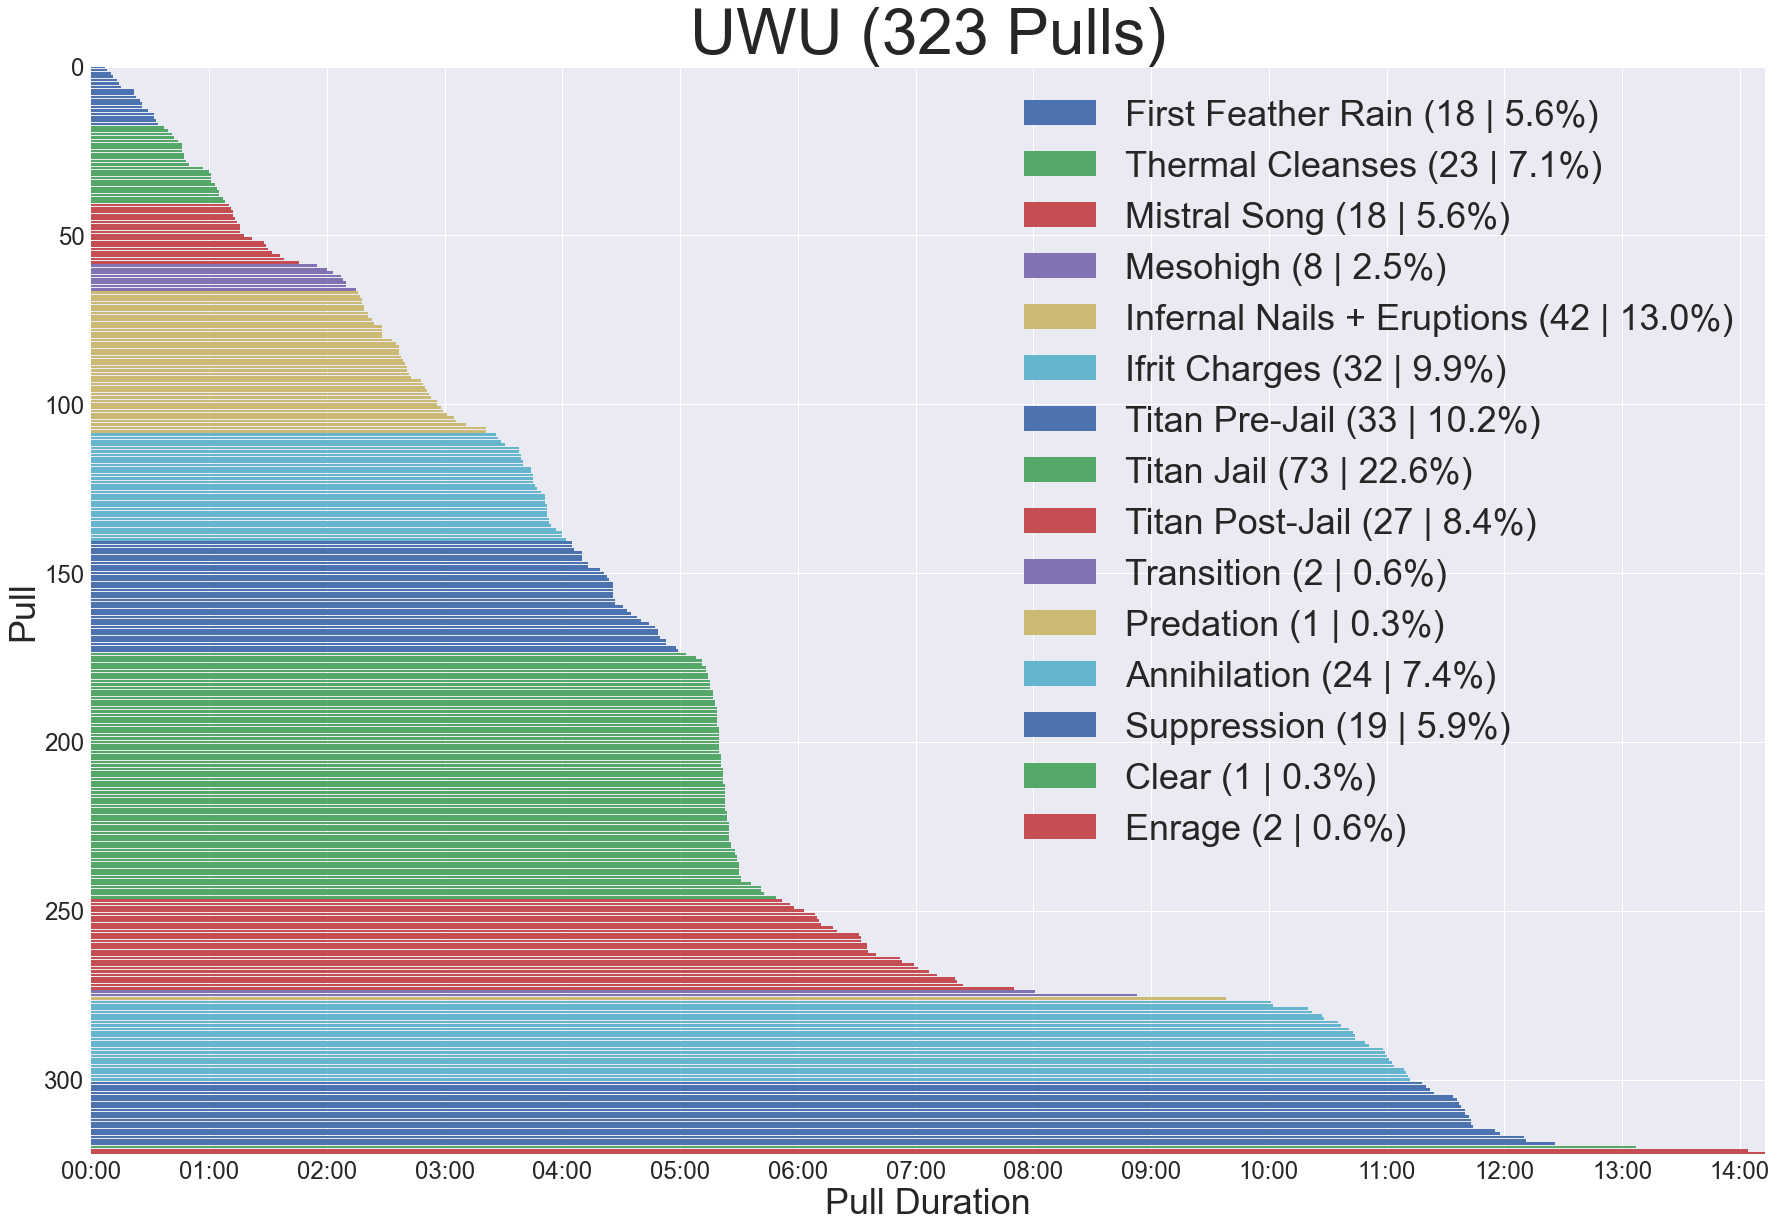

In [30]:
mpl.style.use('seaborn')
fig, ax = plt.subplots(figsize=(30,20))
for event in inst['Event'].unique():
    group = inst[inst['Event'] == event]
    ax.barh(group.index, group['Seconds'], label=f'{event} ({len(group)} | {100 * len(group) / len(inst):.1f}%)')
max_index = inst.index.max()
max_sec = inst['Seconds'].max()
x_ticks_sec = np.arange(0, max_sec, 60)
x_ticks = [time.strftime("%M:%S", time.gmtime(x)) for x in x_ticks_sec]
ax.set_xticks(x_ticks_sec, x_ticks)
ax.set_xlim(0, max_sec)
ax.set_ylim(0, max_index)
ax.invert_yaxis()
ax.set_title(f'UWU ({len(inst)} Pulls)', fontsize=64)
ax.set_xlabel('Pull Duration', fontsize=36)
ax.set_ylabel('Pull', fontsize=36)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.legend(fontsize=36)